# 4.3
## 1.
### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### Ler os dados

In [3]:
dados_lidos = pd.read_csv("CO_data.csv")

### Variáveis

In [4]:
# Listas de paises e anos
areas_geo = ["Africa", "Asia", "South America", "North America", "Europe", "Oceania"]
anos = list(range(2000, 2022))

# Definição das condições de filtragem.
condicao_anos = dados_lidos["year"].isin(anos)

### Obter dados dos anos pretendidos para as áreas geográficas em estudo.

In [5]:
dados_areas_geo = {}

for area_geo in areas_geo:
    condicao_area_geo = dados_lidos.country == area_geo
    dados_areas_geo[area_geo] = list(dados_lidos.loc[condicao_anos & condicao_area_geo, ["co2"]]["co2"])

dados_trabalho = pd.DataFrame(dados_areas_geo)
# dados_trabalho.insert(0, "year", anos)

### Verificação dos pressupostos

As variáveis ("Emissão de $CO_2$ de carvão") são contínuas.
Não existem outliers (ver Boxplot abaixo).
Existe relação linear, porque dizem respeito ao mesmo intervalo de tempo (anos). 

#### Homocedasticidade (Variâncias iguais)

$H_0$: As amostras têm variâncias iguais
$H_1$: As amostras não têm variâncias iguais

In [6]:
lista_dados = list(dados_areas_geo.values())
result_levene = stats.levene(*lista_dados)
print(f"Estatistica: {result_levene.statistic}\np-value: {result_levene.pvalue}")


Estatistica: 51.12822579414353
p-value: 1.0261338190289548e-28


Como o valor de p-value é muito baixo (próximo de zero) rejeitamos a hipótese nula, ou seja, consideramos que as variâncias não são iguais.

#### Normalidade (shapiro)

In [7]:
stats.shapiro(dados_trabalho)

ShapiroResult(statistic=0.7802441599602413, pvalue=8.731688749385906e-13)

#### Boxplot

C:\Users\paulo\AppData\Local\Temp\ipykernel_22220\3824902836.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_bp.show()


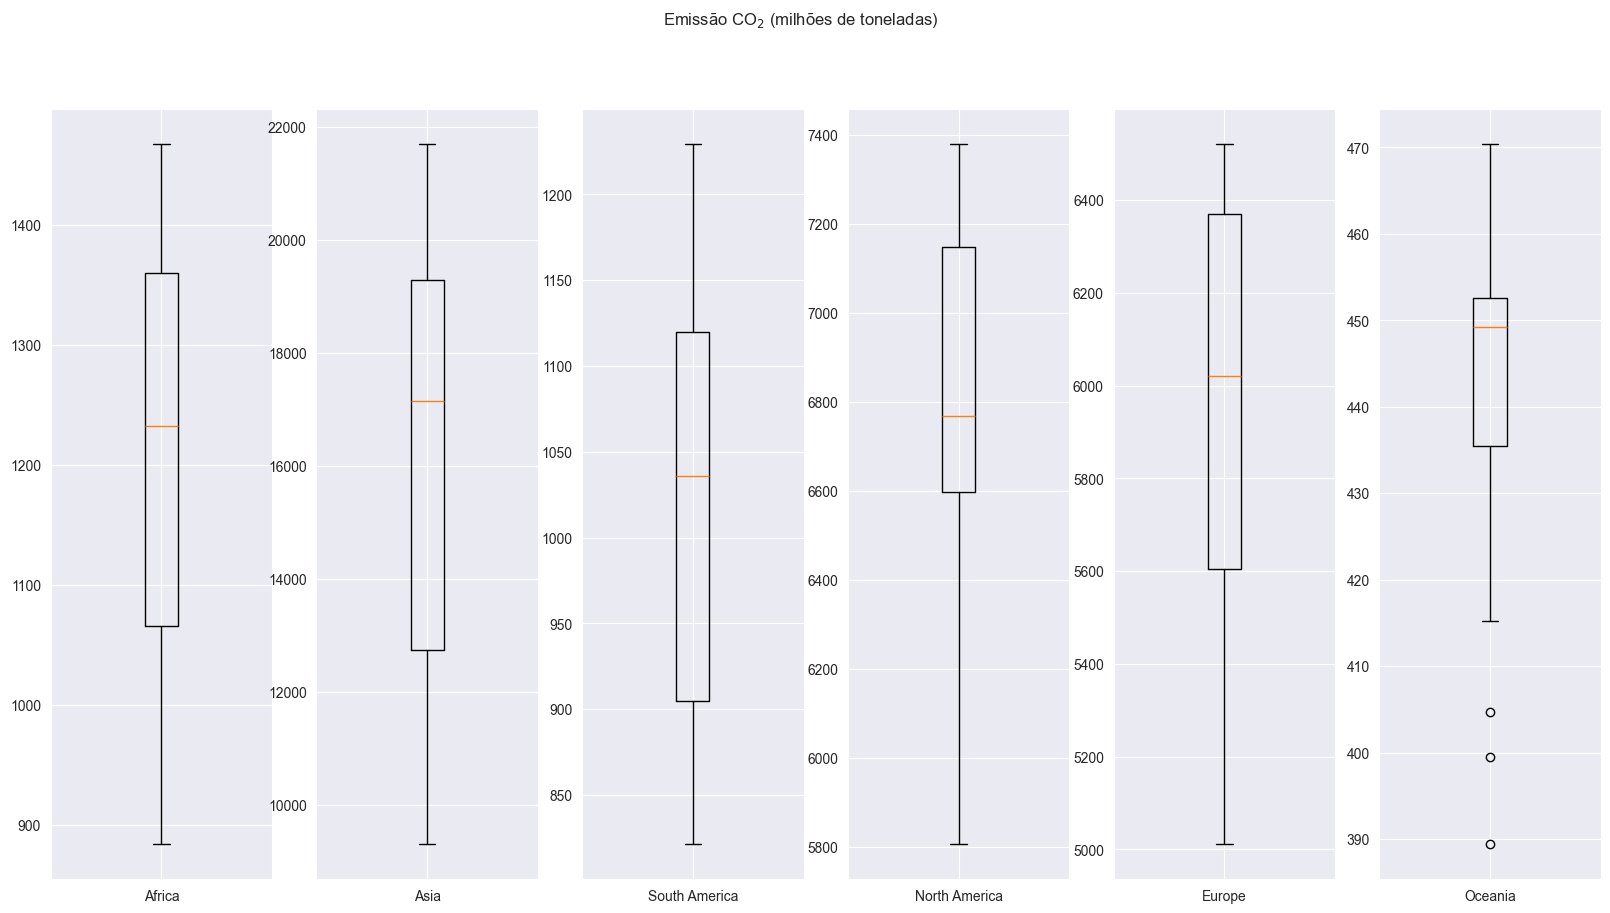

In [60]:
fig_bp, ax_bp = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
emissoes_areas_geo = list(dados_areas_geo.values())

boxplots = []

# boxplot = ax_bp.boxplot(emissoes_areas_geo, labels=areas_geo)
for idx in range(0, 6):
    boxplot = ax_bp[idx].boxplot(emissoes_areas_geo[idx:idx+1], labels=areas_geo[idx:idx+1])
    boxplots.append(boxplot)

fig_bp.suptitle(r"Emissão CO$_2$ (milhões de toneladas)")
fig_bp.show()


### Tabela de correlação

In [ ]:
matriz_das_correlacoes = dados_trabalho.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_das_correlacoes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz das correlações - Coeficientes de Pearson')
plt.show()